Paris 2024 Gold Medal Analysis: GDP and population

In [11]:
# load libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter

Loading Data. Data download from https://www.kaggle.com/datasets/sajkazmi/paris-olympics-2024-games-dataset-updated-daily/data 

In [2]:
# load kaggle data:
# total medals
medals_df = pd.read_csv('medals_total.csv')
# athlete information
athletes_df = pd.read_csv('athletes.csv')

# Ensure the athletes_df has unique country_code and country_full pairs
unique_countries_df = athletes_df[['country_code', 'country_full']].drop_duplicates()

# Merge with the medals_df
df = pd.merge(medals_df, unique_countries_df, on='country_code', how='left')
df.head()

# Save merged df as csv
df.to_csv('merged_medals_data.csv', index=False)


Download GDP data:

In [19]:
# URL of the Wikipedia page with GDP data
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

# Send a GET request to the website
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with GDP data
table = soup.find('table', {'class': 'wikitable'})

# Create lists to store the data
countries = []
gdp_values = []

# Loop through the rows of the table, we will use the IMF data. 
for index, row in enumerate(table.find_all('tr')[1:]):  # Skip the header row
    cells = row.find_all('td')
    
    if len(cells) > 1:  # Ensure there are enough columns
        # Extract the country name from the first cell, which might be nested inside tags
        country = cells[0].get_text(strip=True)
        
        # Extract GDP from the appropriate column, ensuring it aligns with your specific table structure
        gdp = cells[1].get_text(strip=True).replace(',', '').replace('†', '').replace('‡', '')
        
        # Debugging: Print extracted values to ensure correctness
        print(f"Processing row {index+1}: Country: {country}, GDP: {gdp}")
        
        countries.append(country)
        gdp_values.append(gdp)

# Create a DataFrame from the scraped data
gdp_df = pd.DataFrame({
    'country_full': countries,
    'gdp': gdp_values
})

# Filter out the row where the country is "World" as we do not need this
gdp_df = gdp_df[gdp_df['country_full'] != 'World'].reset_index(drop=True)
# check that 'World has been removed:
gdp_df.head()

# Convert GDP to numeric, errors='coerce' will turn non-numeric values into NaN
gdp_df['gdp'] = pd.to_numeric(gdp_df['gdp'], errors='coerce')

# Display the first few rows of the DataFrame
gdp_df.head()

Processing row 2: Country: World, GDP: 109529216
Processing row 3: Country: United States, GDP: 28781083
Processing row 4: Country: China, GDP: 18532633
Processing row 5: Country: Germany, GDP: 4591100
Processing row 6: Country: Japan, GDP: 4110452
Processing row 7: Country: India, GDP: 3937011
Processing row 8: Country: United Kingdom, GDP: 3495261
Processing row 9: Country: France, GDP: 3130014
Processing row 10: Country: Brazil, GDP: 2331391
Processing row 11: Country: Italy, GDP: 2328028
Processing row 12: Country: Canada, GDP: 2242182
Processing row 13: Country: Russia, GDP: 2056844
Processing row 14: Country: Mexico, GDP: 2017025
Processing row 15: Country: Australia, GDP: 1790348
Processing row 16: Country: South Korea, GDP: 1760947
Processing row 17: Country: Spain, GDP: 1647114
Processing row 18: Country: Indonesia, GDP: 1475690
Processing row 19: Country: Netherlands, GDP: 1142513
Processing row 20: Country: Turkey, GDP: 1113561
Processing row 21: Country: Saudi Arabia, GDP: 

,country_full,gdp
0,United States,28781083.0
1,China,18532633.0
2,Germany,4591100.0
3,Japan,4110452.0
4,India,3937011.0


Merge exisiting data frame and new dateframe that contains GDP values for each country. Note that we will have no GDP for the Refugee Olympic Team (code: EOR) and Individual Neutral Athletes (code: AINs). Additionaly, the IMF did not contain GDP data for Cuba & North Korea. 

In [20]:
# Merge
df_merged = pd.merge(df, gdp_df, on='country_full', how='left')

# However we have missing values as some country names appear differently from the kaggle dataset & the GDP data set
missing_values = df_merged[df_merged.isna().any(axis=1)]

# Create a mapping dictionary to ensure we don't get missing values when merging
country_name_map = {
    'United States of America': 'United States',
    "People's Republic of China": 'China',
    'Great Britain': 'United Kingdom',
    'Republic of Korea': 'South Korea',
    'Islamic Republic of Iran': 'Iran',
    'Czechia': 'Czech Republic',
    'Cuba': 'Cuba', # Cuba GDP is not available
    'Chinese Taipei': 'Taiwan',
    'Hong Kong, China': 'Hong Kong',
    'Türkiye': 'Turkey',
    "Democratic People's Republic of Korea": 'North Korea', # GDP not available
    'Republic of Moldova': 'Moldova',
    "Côte d'Ivoire": 'Ivory Coast',
    'Cabo Verde': 'Cape Verde'
}

# Now apply mapping to df
df['country_full'] = df['country_full'].map(country_name_map).fillna(df['country_full'])
# Now merge again
df_merged = pd.merge(df, gdp_df, on='country_full', how='left')


Download population data:

In [5]:
# URL of the Worldometers page
url = 'https://www.worldometers.info/world-population/population-by-country/'

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the population data
table = soup.find('table', {'id': 'example2'})

# Create lists to store the country names and populations
countries = []
populations = []

# Iterate over each row in the table
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')

    if len(cols) >= 2:  # Ensure there are enough columns
        # Extract the country name from the second column
        country = cols[1].get_text(strip=True)

        # Extract population from the third column
        population = cols[2].get_text(strip=True).replace(',', '')  # Remove commas from numbers

        # Debugging: Print extracted values to ensure correctness
        print(f"Processing row {index+1}: Country: {country}, Population: {population}")

        countries.append(country)
        populations.append(int(population))

# Create a DataFrame from the scraped data
population_df = pd.DataFrame({
    'country_full': countries,
    'population': populations
})

Processing row 211: Country: India, Population: 1450935791
Processing row 211: Country: China, Population: 1419321278
Processing row 211: Country: United States, Population: 345426571
Processing row 211: Country: Indonesia, Population: 283487931
Processing row 211: Country: Pakistan, Population: 251269164
Processing row 211: Country: Nigeria, Population: 232679478
Processing row 211: Country: Brazil, Population: 211998573
Processing row 211: Country: Bangladesh, Population: 173562364
Processing row 211: Country: Russia, Population: 144820423
Processing row 211: Country: Ethiopia, Population: 132059767
Processing row 211: Country: Mexico, Population: 130861007
Processing row 211: Country: Japan, Population: 123753041
Processing row 211: Country: Egypt, Population: 116538258
Processing row 211: Country: Philippines, Population: 115843670
Processing row 211: Country: DR Congo, Population: 109276265
Processing row 211: Country: Vietnam, Population: 100987686
Processing row 211: Country: Ir

Edit the population data frame:

In [21]:
# First, enter kosovo population manually, data from https://en.wikipedia.org/wiki/Demographics_of_Kosovo#cite_note-1
# Create a new row as a dictionary
new_row = pd.DataFrame({'country_full': ['Kosovo'], 'population': [1586659]})

# Append the new row to the DataFrame
population_df = pd.concat([population_df, new_row], ignore_index=True)

# Now tidy up country names where they are not matching between data frames for merging
population_df['country_full'] = population_df['country_full'].replace('Czech Republic (Czechia)', 'Czech Republic')
population_df['country_full'] = population_df['country_full'].replace("Côte d'Ivoire", 'Ivory Coast')
population_df['country_full'] = population_df['country_full'].replace('Cabo Verde', 'Cape Verde')

Merge exisiting dataframe with GDP data and population dataframe. 

In [22]:
# Merge
df_merged2 = pd.merge(df_merged, population_df, on='country_full', how='left')

# Check missing values again, should just be AIN and Refugee team
missing_values2 = df_merged2[df_merged2['population'].isna()]
print(missing_values2['country_full'])

46                     AIN
87    Refugee Olympic Team
Name: country_full, dtype: object


Create new object to use. Constrain analysis to top 10 countires by number of gold medals. 

In [154]:
# Data to use
data = df_merged2

# Constrain analysis to top 10 counties by number of gold medals
data = data.nlargest(10, 'Gold Medal')
data.head(10)

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total,country_full,gdp,population
0,USA,40,44,42,126,United States,28781083.0,3.454266e+08
1,CHN,39,27,24,90,China,18532633.0,1.419321e+09
2,JPN,20,12,13,45,Japan,4110452.0,1.237530e+08
3,AUS,18,19,16,53,Australia,1790348.0,2.671320e+07
4,FRA,16,26,22,64,France,3130014.0,6.654853e+07
5,NED,15,7,12,34,Netherlands,1142513.0,1.822874e+07
6,GBR,14,21,29,64,United Kingdom,3495261.0,6.913819e+07
7,KOR,13,9,10,32,South Korea,1760947.0,5.171759e+07
8,ITA,12,13,13,38,Italy,2328028.0,5.934287e+07
9,GER,11,13,8,32,Germany,4591100.0,8.455224e+07


Check the relationship between GDP and population. There is a moderate positive correlation (r = 0.62). 

In [155]:
# check correlation between GDP and population 
# correlate population and gdp
data.head()

data[['gdp', 'population']].corr()

,gdp,population
gdp,1.000000,0.622806
population,0.622806,1.000000


Plot the correlation. Highlight China and USA as they jump out from the other 8 countires. 

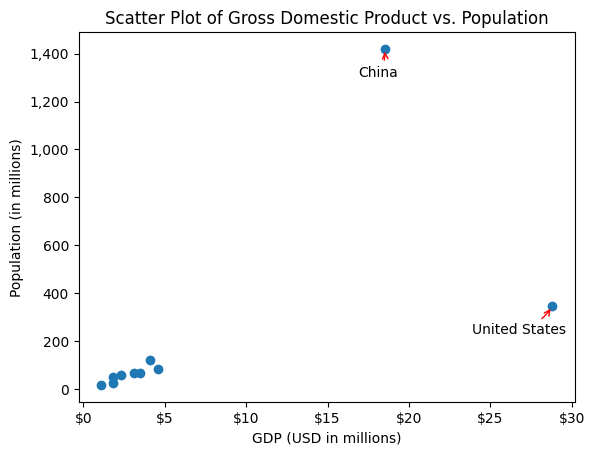

In [156]:
# Create new column of population to display value in millions and rounded to 1 decimal place
data['population_mil'] = (data['population'] / 1_000_000).round(1)

# Create new column of gdp to display value in millions and rounded to 1 decimal place
data['gdp_mil'] = (data['gdp'] / 1_000_000).round(1)

# Create a scatter plot
plt.scatter(data['gdp_mil'], data['population_mil'])

# Add labels and title
plt.xlabel('GDP (USD in millions)')
plt.ylabel('Population (in millions)')
plt.title('Scatter Plot of Gross Domestic Product vs. Population')

# Format the x-axis to show dollar signs
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):}'))
# Format the y-axis to show commas for thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Highlight specific points
highlight = data[data['country_full'].isin(['United States', 'China'])]

for i, row in highlight.iterrows():
    plt.annotate(
        row['country_full'], 
        (row['gdp_mil'], row['population_mil']),
        textcoords="offset points",
        xytext=(10, -20),  # Adjust the text offset here
        ha='right',
        fontsize=10,
        color='black',
        arrowprops=dict(
            facecolor='red', 
            edgecolor='red', 
            arrowstyle='->', 
            lw=1,
            connectionstyle='arc3,rad=0.2'  # Adjust the connection style if needed
        )
    )

# Show the plot
plt.show()

Now create additional columns in our data frame that take into account the GDP and population (per 1 million persons) for gold medal count.

In [157]:
# Create 'gold_by_gdp' column
data['gdp_by_gold'] = data['gdp'] / data['Gold Medal']
data.head(10)

# Create 'gold_per_1m' column
data['gold_per_1m'] = (data['Gold Medal'] / data['population']) * 1000000
data.head(10)

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total,country_full,gdp,population,population_mil,gdp_mil,gdp_by_gold,gold_per_1m
0,USA,40,44,42,126,United States,28781083.0,3.454266e+08,345.4,28.8,719527.075000,0.115799
1,CHN,39,27,24,90,China,18532633.0,1.419321e+09,1419.3,18.5,475195.717949,0.027478
2,JPN,20,12,13,45,Japan,4110452.0,1.237530e+08,123.8,4.1,205522.600000,0.161612
3,AUS,18,19,16,53,Australia,1790348.0,2.671320e+07,26.7,1.8,99463.777778,0.673824
4,FRA,16,26,22,64,France,3130014.0,6.654853e+07,66.5,3.1,195625.875000,0.240426
5,NED,15,7,12,34,Netherlands,1142513.0,1.822874e+07,18.2,1.1,76167.533333,0.822876
6,GBR,14,21,29,64,United Kingdom,3495261.0,6.913819e+07,69.1,3.5,249661.500000,0.202493
7,KOR,13,9,10,32,South Korea,1760947.0,5.171759e+07,51.7,1.8,135457.461538,0.251365
8,ITA,12,13,13,38,Italy,2328028.0,5.934287e+07,59.3,2.3,194002.333333,0.202215
9,GER,11,13,8,32,Germany,4591100.0,8.455224e+07,84.6,4.6,417372.727273,0.130097


Plot GDP per gold medal for each country:

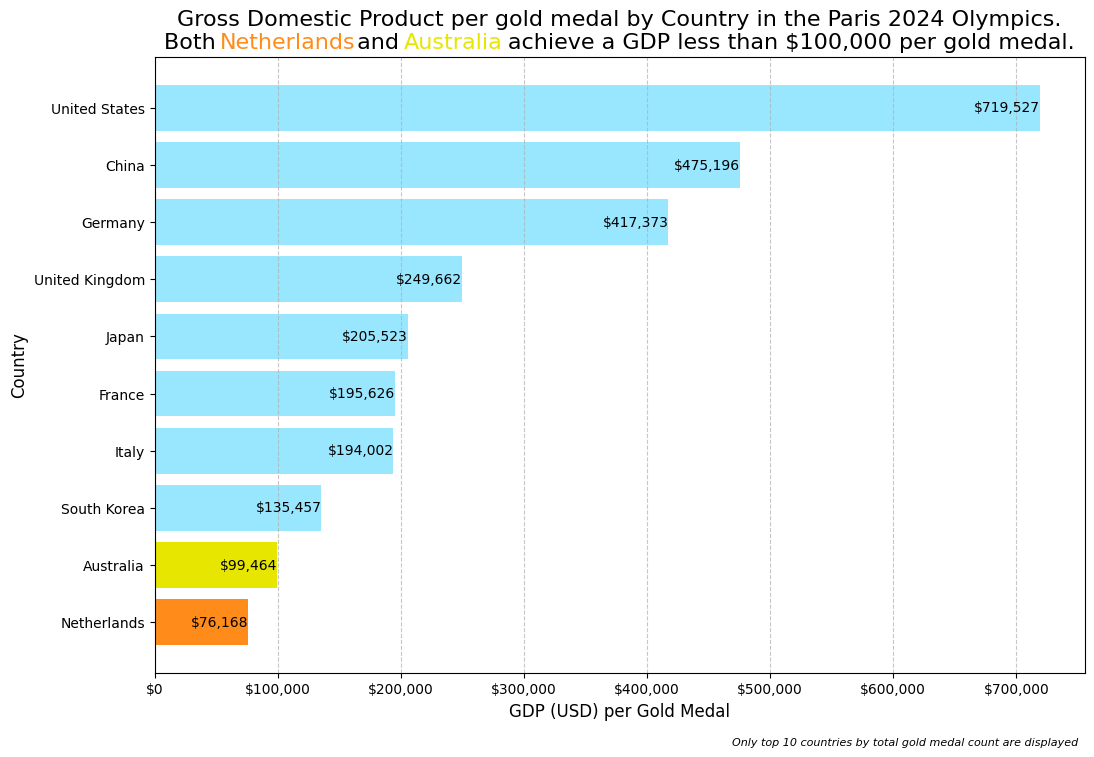

In [158]:
# Sort the data by 'gdp_by_gold' with ascending = True so smallest values at bottom of y axis
data_sorted = data.sort_values(by='gdp_by_gold', ascending = True)

# Define the colors, with a condition to highlight Australia and Netherlands
colours = ['#e6e600' if row['country_full'] == 'Australia' else 
          '#ff8c1a' if row['country_full'] == 'Netherlands' else 
          '#99e6ff' for _, row in data_sorted.iterrows()]

# Now plot
plt.figure(figsize=(12, 8))
# Horizontal bar plots
bars = plt.barh(data_sorted['country_full'], data_sorted['gdp_by_gold'], color=colours)

# Add labels
plt.xlabel('GDP (USD) per Gold Medal', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.figtext(0.75, 0.02, 'Only top 10 countries by total gold medal count are displayed', ha='center', fontsize=8, fontstyle='italic')

# add x axis gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Custom title split into seperate strings 
title_part1 = 'Gross Domestic Product per gold medal by Country in the Paris 2024 Olympics.\n'
title_part2 = 'Both      '
netherlands_text = 'Netherlands'
blank1 = '            '
title_part3 = ' and '
blank2 = '            '
australia_text = 'Australia'
blank3 = '          '
title_part4 = ' achieve a GDP less than $100,000 per gold medal.'

# Add the custom title with blank spaces for colours strings
plt.title(title_part1 + title_part2 + blank1 + blank2 + blank3 + title_part4, fontsize=16)

# Add the colored strings including title_part3 which is 'and' 
plt.text(0.07, 1.0135, netherlands_text, fontsize=16, color='#ff8c1a', transform=plt.gca().transAxes)
plt.text(0.21, 1.0135, title_part3, fontsize=16, transform=plt.gca().transAxes)
plt.text(0.268, 1.0135, australia_text, fontsize=16, color='#e6e600', transform=plt.gca().transAxes)

# Format the x-axis to show dollar signs and commas
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Add the value of 'gdp_by_gold' onto each bar with dollar signs
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2,
        # Format the width with a dollar sign and commas
        f'${bar.get_width():,.0f}',  
        va='center',
        ha='right',
        fontsize=10,
        color='black'
    )

# Save as png
plt.savefig('GDP_per_gold_medal_fig.png', format='png', dpi=300)
# Show plot
plt.show()

Now by Gold medal by population:

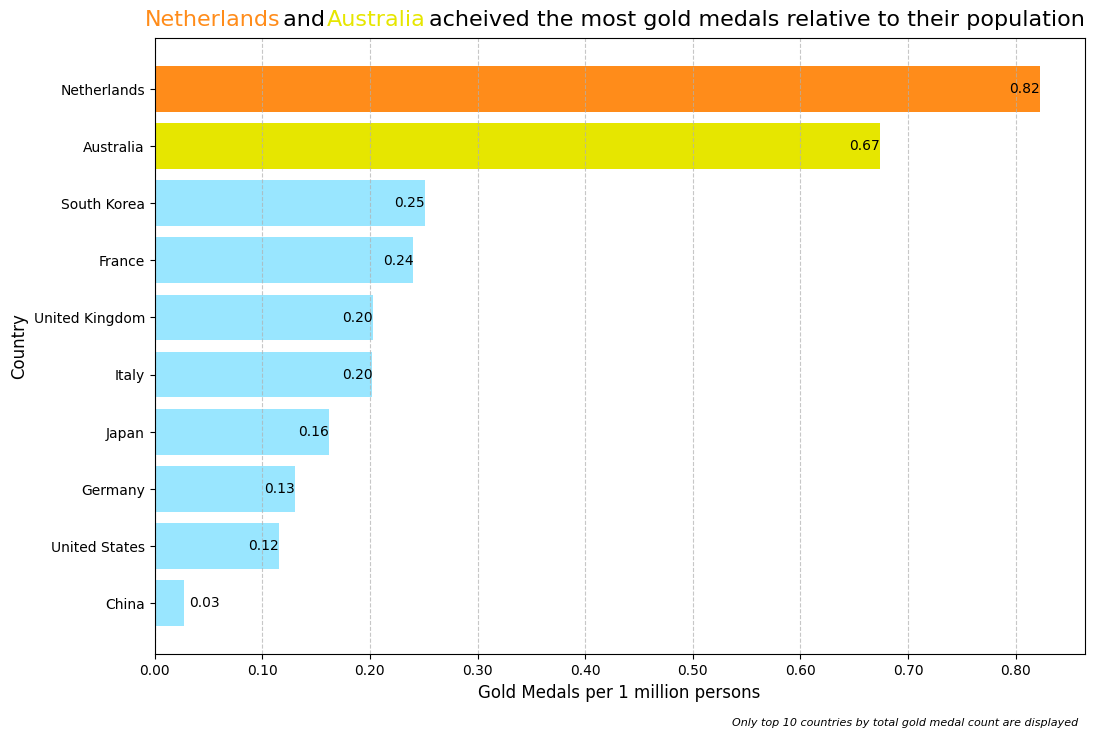

In [159]:
# Sort the data by 'gold_per_1m' with ascending = True so smallest values at bottom of y axis
data_sorted = data.sort_values(by='gold_per_1m', ascending = True)

# Define the colors, with a condition to highlight Australia and Netherlands
colours = ['#e6e600' if row['country_full'] == 'Australia' else 
          '#ff8c1a' if row['country_full'] == 'Netherlands' else 
          '#99e6ff' for _, row in data_sorted.iterrows()]

# Now plot
plt.figure(figsize=(12, 8))
# Horizontal bar plots
bars = plt.barh(data_sorted['country_full'], data_sorted['gold_per_1m'], color=colours)

# Add labels
plt.xlabel('Gold Medals per 1 million persons', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.figtext(0.75, 0.02, 'Only top 10 countries by total gold medal count are displayed', ha='center', fontsize=8, fontstyle='italic')

# add x axis gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format the x-axis to show two decimal place
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Custom title strings
netherlands_text = 'Netherlands'
title_part1 = ' and '
australia_text = 'Australia'
title_part2 = 'acheived the most gold medals relative to their population'

# Add the title strings together 
plt.text(-0.01, 1.02, netherlands_text, fontsize=16, color='#ff8c1a', transform=plt.gca().transAxes)
plt.text(0.13, 1.02, title_part1, fontsize=16, transform=plt.gca().transAxes)
plt.text(0.185, 1.02, australia_text, fontsize=16, color='#e6e600', transform=plt.gca().transAxes)
plt.text(0.295, 1.02, title_part2, fontsize=16, transform=plt.gca().transAxes)

# Add the value of 'gold_per_1m' onto each bar, rounding to 1 decimal place, with condition for text placement
for bar in bars:
    value = bar.get_width()
    country = bar.get_y() + bar.get_height() / 2  # y-coordinate for center alignment

    # Conditional statement for text placement
    if data_sorted['country_full'].iloc[bars.index(bar)] == 'China':
        plt.text(
            bar.get_width() + 0.005,  # Offset to place text to the right of the bar
            bar.get_y() + bar.get_height() / 2,
            f'{value:.2f}',  # Rounded to 2 decimal place
            va='center',
            ha='left',  # Align text to the left since it is positioned to the right of the bar
            fontsize=10,
            color='black'
        )
    else:
        plt.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height() / 2,
            f'{value:.2f}',  # Rounded to 2 decimal place
            va='center',
            ha='right',  # Align text to the right of the bar
            fontsize=10,
            color='black'
        )

# Save as png
plt.savefig('gold_medal_by_population_fig.png', format='png', dpi=300)
# Show plot
plt.show()